# SVM Code

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
import joblib
import matplotlib.pyplot as plt

In [14]:
data = datasets.load_iris()
X = data.data
y = data.target
class_names = data.target_names
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
svc = SVC(probability=True, random_state=42)

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["rbf", "linear", "poly"],
    "gamma": ["scale", "auto"],
    # "degree": [2,3]  # only needed if kernel='poly'
}

In [17]:

grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1,
)


In [18]:

grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

best_svc = grid.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV accuracy: 0.975


In [19]:
y_pred = best_svc.predict(X_test_scaled)
y_proba = best_svc.predict_proba(X_test_scaled)  # if you need probabilities

acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Test Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [20]:
def compute_confusion_elements(conf_mat):
    """
    For each class i:
      TP_i = conf_mat[i,i]
      FP_i = sum(conf_mat[:,i]) - TP_i
      FN_i = sum(conf_mat[i,:]) - TP_i
      TN_i = total - TP_i - FP_i - FN_i
    """
    n_classes = conf_mat.shape[0]
    total = conf_mat.sum()
    elems = []
    for i in range(n_classes):
        TP = conf_mat[i, i]
        FP = conf_mat[:, i].sum() - TP
        FN = conf_mat[i, :].sum() - TP
        TN = total - TP - FP - FN
        elems.append({"class": i, "TP": TP, "FP": FP, "FN": FN, "TN": TN})
    return elems

elems = compute_confusion_elements(cm)
print("\nPer-class TP/FP/FN/TN:")
for e in elems:
    print(e)



Per-class TP/FP/FN/TN:
{'class': 0, 'TP': np.int64(10), 'FP': np.int64(0), 'FN': np.int64(0), 'TN': np.int64(20)}
{'class': 1, 'TP': np.int64(9), 'FP': np.int64(1), 'FN': np.int64(1), 'TN': np.int64(19)}
{'class': 2, 'TP': np.int64(9), 'FP': np.int64(1), 'FN': np.int64(1), 'TN': np.int64(19)}


In [21]:
precision_macro = precision_score(y_test, y_pred, average="macro")
recall_macro = recall_score(y_test, y_pred, average="macro")
f1_macro = f1_score(y_test, y_pred, average="macro")

precision_weighted = precision_score(y_test, y_pred, average="weighted")
recall_weighted = recall_score(y_test, y_pred, average="weighted")
f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("\nMacro   - Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}".format(precision_macro, recall_macro, f1_macro))
print("Weighted- Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}".format(precision_weighted, recall_weighted, f1_weighted))



Macro   - Precision: 0.9333, Recall: 0.9333, F1: 0.9333
Weighted- Precision: 0.9333, Recall: 0.9333, F1: 0.9333


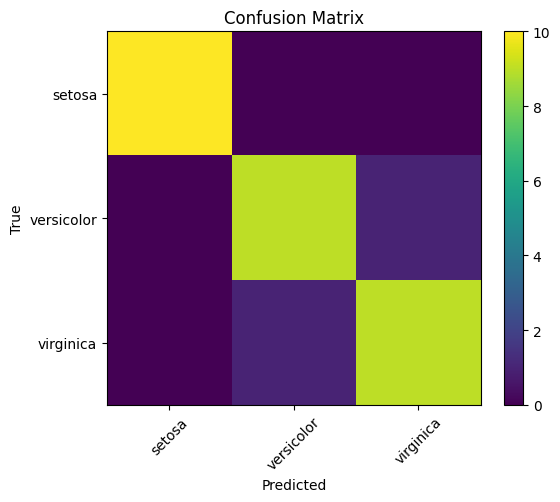

In [22]:
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
